In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
from sklearn.linear_model import LinearRegression

In [3]:
ad_sale_data = pd.read_excel('advertising_sales_data.xlsx',index_col='Campaign')

In [4]:
ad_sale_data.head()

,TV,Radio,Newspaper,Sales
Campaign,,,,
camp1,230.1,37.8,69.2,22.1
camp2,44.5,39.3,45.1,10.4
camp3,17.2,45.9,69.3,12.0
camp4,151.5,41.3,58.5,16.5
camp5,180.8,10.8,58.4,17.9


In [5]:
ad_sale_data.isnull().sum()

TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

# **Q1**

In [6]:
ad_sale_data.TV.mean()

147.0425

Average amount spent on TV advertisement is $147.0425  

# **Q2**  drawing out the corelation by building and examining regression line on a scatter plot

<AxesSubplot: title={'center': 'Radio vs Sales'}, xlabel='Radio', ylabel='Sales'>

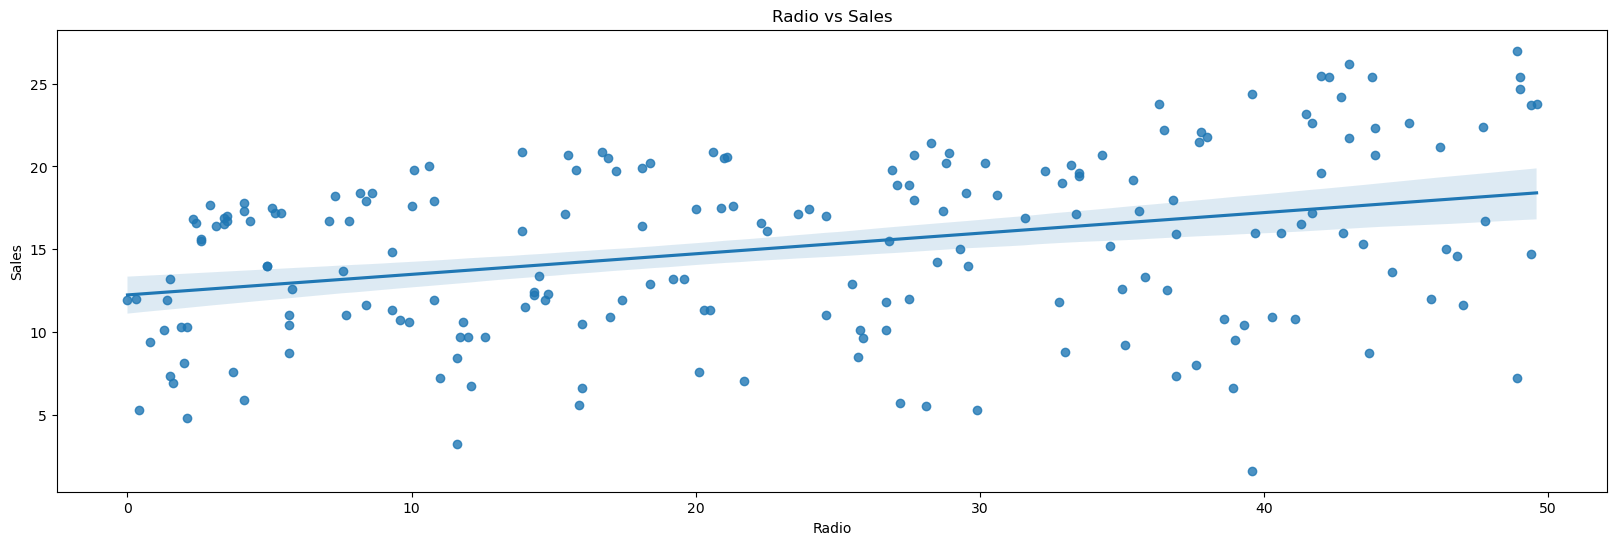

In [7]:
plt.figure(figsize=(20,6))
plt.title('Radio vs Sales')
sns.regplot(x='Radio',y='Sales',data = ad_sale_data)

There is a weak correlation between 'Radio' and 'Sales' as there is a visible flat regression line however we can say there is a week positive correlation between 'Radio' and 'Sales'

# **Q3.** 
Measuring how much variance in sales data can be explained by Radio,TV,Newspaper using the score function of LinearRegressionModel which returns the R^2 coefficent whoose value is between 1 and 0 .Score of  1 means that the feature can complelety explain the variance and score of 0 means that the target variable is not dependent on the feature 

In [41]:
radio_avg = ad_sale_data.Radio.mean()
model = LinearRegression().fit(ad_sale_data[['Radio']].fillna(radio_avg),ad_sale_data['Sales'])
print("score is:",model.score(ad_sale_data[['Radio']].fillna(radio_avg),ad_sale_data['Sales']))

score is: 0.1222556420317018


Thereby we can say that radio  explains the 12% of the variance in sales 

In [42]:
model = LinearRegression().fit(ad_sale_data[['TV']],ad_sale_data['Sales'])
print('score is:',model.score(ad_sale_data[['TV']],ad_sale_data['Sales']))

score is: 0.8121757029987414


Thereby we can say that TV  explains the 81% of the variance in sales

In [43]:
model = LinearRegression().fit(ad_sale_data[['Newspaper']],ad_sale_data['Sales'])
print('score is:',model.score(ad_sale_data[['Newspaper']],ad_sale_data['Sales']))

score is: 0.024951369862864836


Thereby we can say that Newspaper  explains only 2% of the variance in sales 

**Therefore as TV explains the most of variance of sales data it has the biggest impact on sales data**

# **Q4**

### Spliting into test and train datasets

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ad_sale_data.iloc[:,:3],ad_sale_data.iloc[:,3],test_size=0.2,random_state=37)

### Handling missing values 

In [12]:
radio_avg = X_train.Radio.mean()
X_train.Radio.fillna(radio_avg,inplace = True) # just replacing NaN values with mean
X_test.Radio.fillna(radio_avg,inplace = True) # just replacing NaN values with mean

### Visualizing the model predictions vs actual predictions

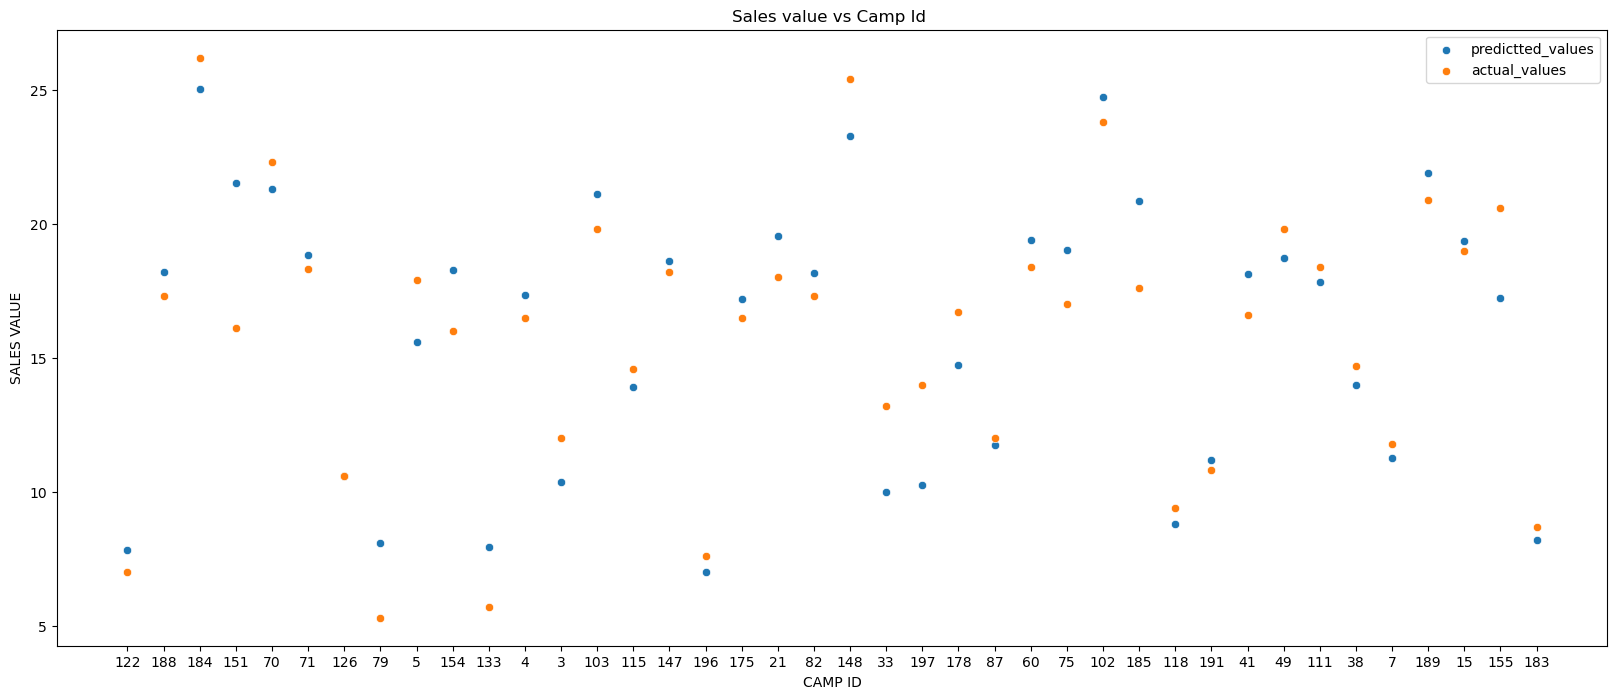

In [38]:
model = LinearRegression().fit(X_train,y_train)
plt.figure(figsize=(20,8))
plt.title('Sales value vs Camp Id ')
sns.scatterplot(x=X_test.index.map(lambda x: x[4:]),y=model.predict(X_test))
sns.scatterplot(x=X_test.index.map(lambda x: x[4:]),y=y_test)
plt.xlabel('CAMP ID')
plt.ylabel('SALES VALUE')
plt.legend(labels=['predictted_values','actual_values'])
plt.show()

**From the above graph we can see that there is not much difference between predicted and actual sales values for differnet Camp ID's**

# **Q5**

In [25]:
to_predict = {'TV':200,'Radio':40,'Newspaper':50}
model.predict(pd.DataFrame(to_predict,index=[0]))[0]


19.89203013194231


**The predictted sales value for the following expenditure data**
<br>
**'TV': 200, 'Radio': 40, 'Newspaper': 50**
<br>
**is: 19.89203013194231**

# **Q6**

###  Normalizing the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
n_X_train = pd.DataFrame(normalizer.fit_transform(X_train))
n_X_test = pd.DataFrame(normalizer.transform(X_test))
n_X_train.columns = X_train.columns
n_X_test.columns = X_test.columns

### Predicting

In [28]:
n_model = LinearRegression().fit(n_X_train,y_train)

from sklearn.metrics import mean_absolute_error
print('without normalizing mean_absolute_error : ',mean_absolute_error(y_test,model.predict(X_test)))
print('after normalizng mean_absolute_error: ',mean_absolute_error(y_test,n_model.predict(n_X_test)))

without normalizing mean_absolute_error :  1.4307532365412863
after normalizng mean_absolute_error:  1.430753236541286


**We can see that there  is no change in performance after and before feature scaling for LinearRegression model**

# **Q7**

In [29]:
bad_model = LinearRegression().fit(X_train[['Newspaper','Radio']],y_train)
print('using all three features mean_absolute_error: ',mean_absolute_error(y_test,model.predict(X_test)))
print('using just Radio, Newspaper mean_absolute_error',mean_absolute_error(y_test,bad_model.predict(X_test[['Newspaper','Radio']])))

using all three features mean_absolute_error:  1.4307532365412863
using just Radio, Newspaper mean_absolute_error 4.466542047434534


**we can see the performance of model has become worse when we use just radio and newspaper mean_absolute_error has increased over 3 times** 

# DATA INSIGHTS

<AxesSubplot: xlabel='TV', ylabel='Sales'>

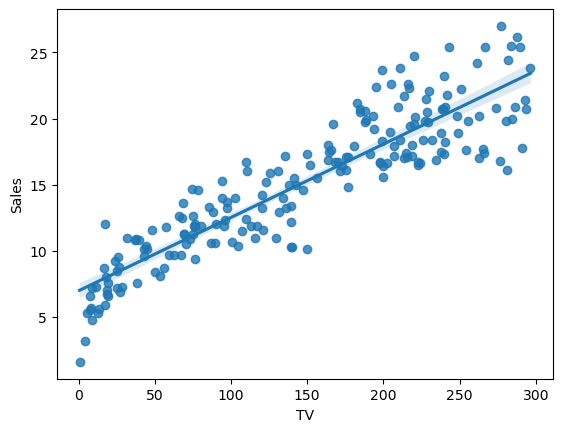

In [4]:
df = ad_sale_data.copy()
sns.regplot(x='TV',y='Sales',data = df)


<AxesSubplot: xlabel='Radio', ylabel='Sales'>

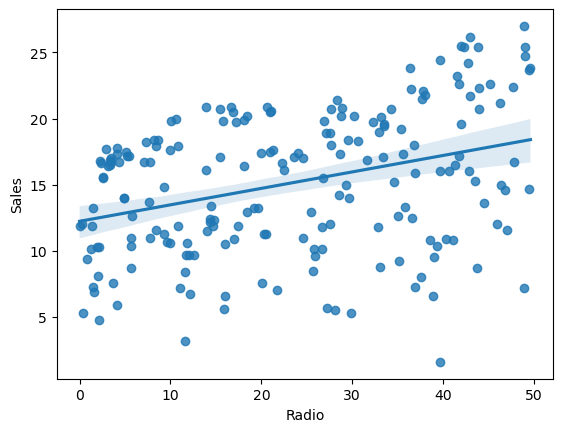

In [7]:
sns.regplot(x='Radio',y='Sales',data = df)

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

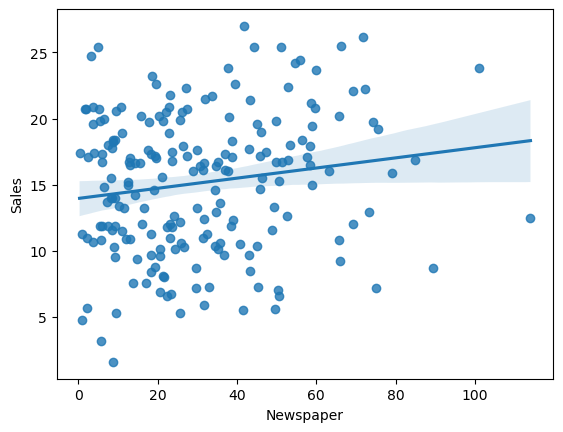

In [8]:
sns.regplot(x='Newspaper',y='Sales',data = df)

<AxesSubplot: xlabel='None', ylabel='Sales'>

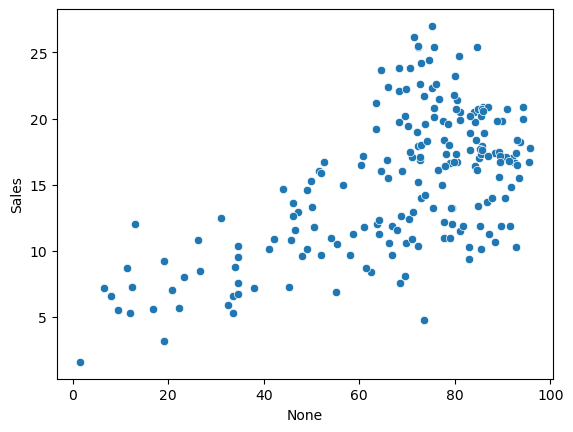

In [21]:
sns.scatterplot(x=(df.TV/(df.TV +df.Radio +df.Newspaper))*100,y=df.Sales)

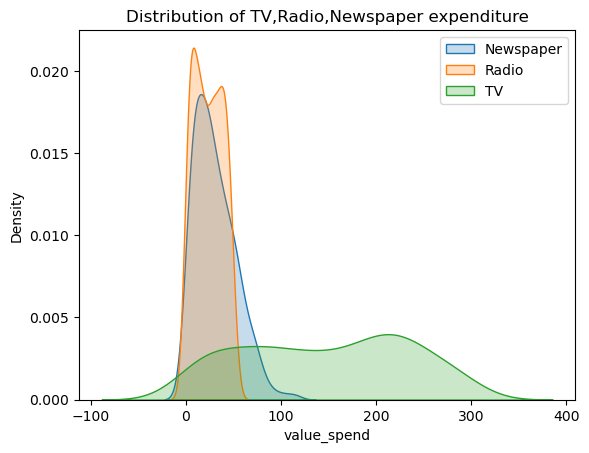

In [33]:
sns.kdeplot(df.Newspaper,fill=True)
sns.kdeplot(df.Radio,fill=True)
sns.kdeplot(df.TV,fill=True)
plt.legend(labels=['Newspaper','Radio','TV'])
plt.xlabel('value_spend')
plt.title('Distribution of TV,Radio,Newspaper expenditure')
plt.show()

<AxesSubplot: title={'center': '% spent on TV over total spent vs Sales'}, xlabel='% spent on TV over total spent', ylabel='Sales'>

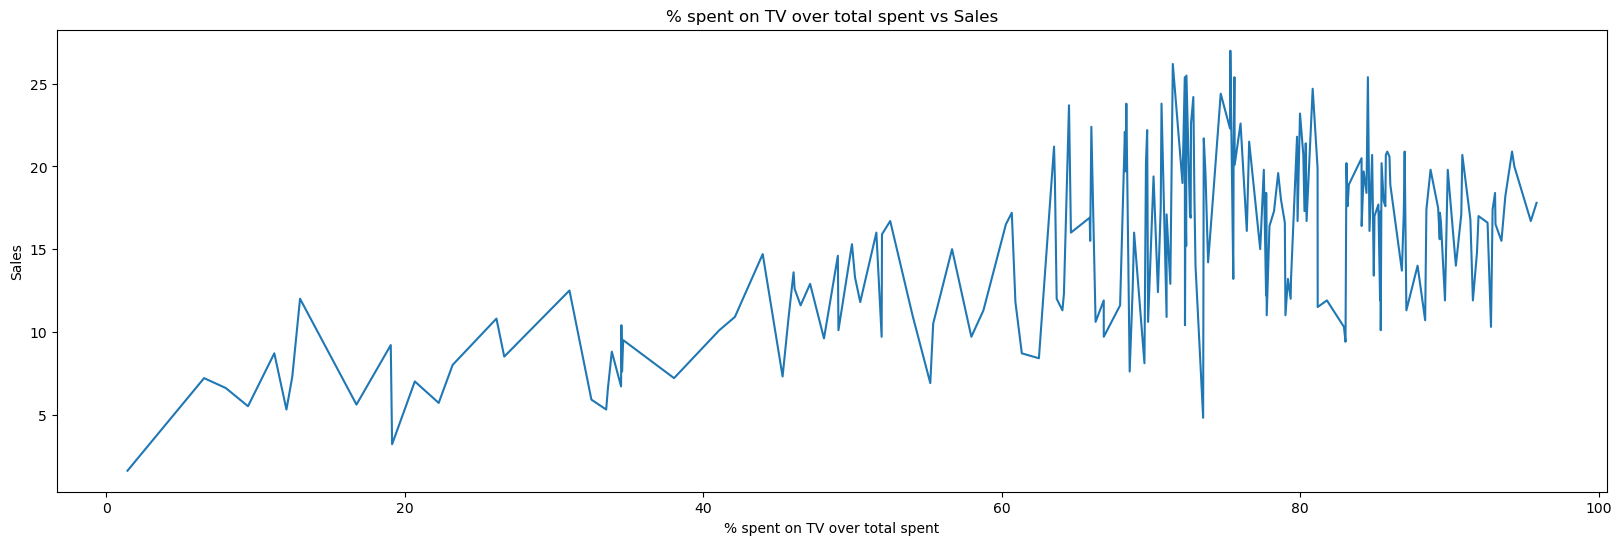

In [32]:
plt.figure(figsize=(20,6))
plt.title('% spent on TV over total spent vs Sales')
plt.xlabel('% spent on TV over total spent')
plt.ylabel('Sales')
sns.lineplot(x=(df.TV/(df.TV +df.Radio +df.Newspaper))*100,y=df.Sales)

In [29]:
bin_range = {0:'0-5',1:'5-10',2:'10-15',3:'15-20',4:'20-25',5:'25+'}
df['bin'] = df.Sales.map(lambda x: bin_range[x//5])
bin_order = ['0-5','5-10','10-15','15-20','20-25','25+']

<AxesSubplot: xlabel='None', ylabel='Sales'>

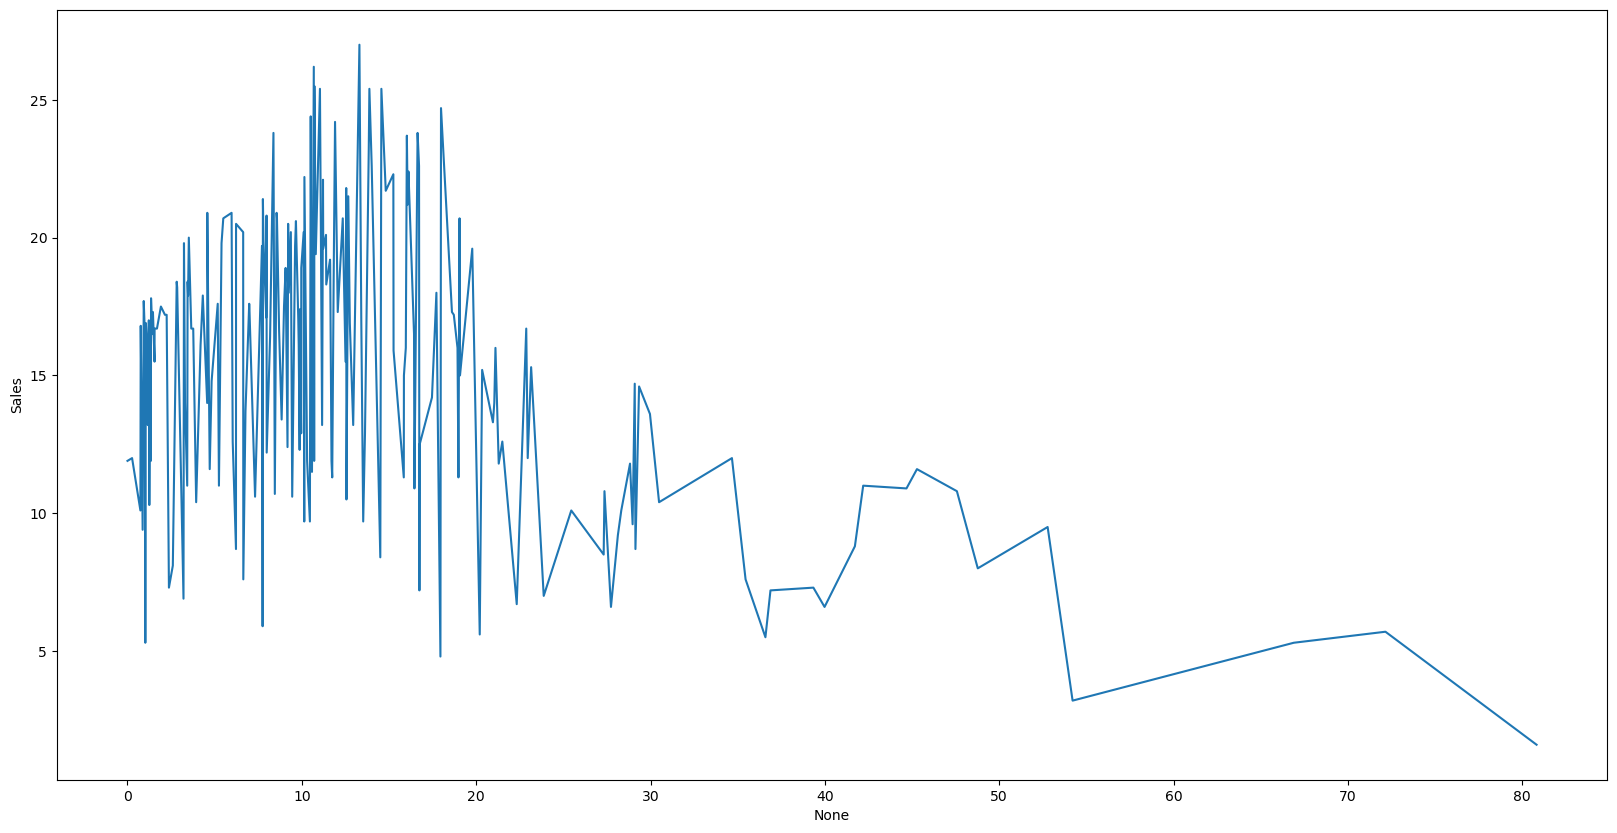

In [36]:
plt.figure(figsize=(20,10))
# sns.barplot(y=df.TV,x=df.bin,order =bin_order)
# sns.barplot(y=df.Radio,x=df.bin,order =bin_order)
sns.lineplot(x=(df.Radio/(df.Newspaper+df.TV+df.Radio))*100,y=df.Sales)


<AxesSubplot: xlabel='None', ylabel='Sales'>

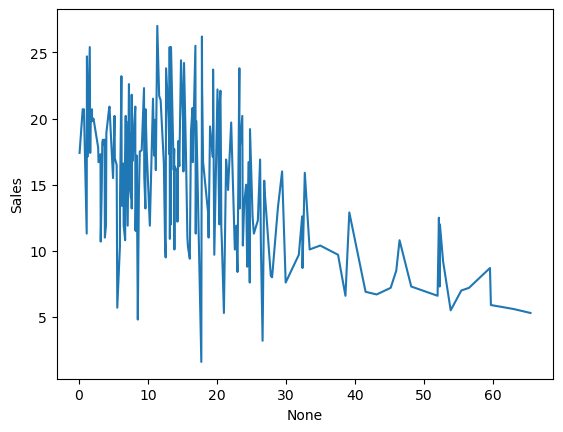

In [39]:
sns.lineplot(x=(df.Newspaper/(df.Newspaper+df.TV+df.Radio))*100,y=df.Sales)

/tmp/ipykernel_153164/2236855791.py:5: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7cc29c423c80> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['Sales >20','_','_','Sales <20'])
/tmp/ipykernel_153164/2236855791.py:5: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7cc29c25b740> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['Sales >20','_','_','Sales <20'])


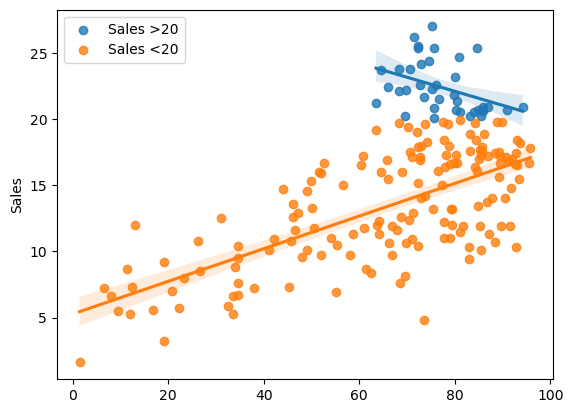

In [22]:
plt_data = df[df.Sales > 20]
sns.regplot(y=plt_data.Sales,x=(plt_data.TV/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt_data = df[df.Sales < 20]
sns.regplot(y=plt_data.Sales,x=(plt_data.TV/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt.legend(labels=['Sales >20','_','_','Sales <20'])
plt.show()

/tmp/ipykernel_153164/1685309666.py:5: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7cc296dc29f0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%TV > 75','_','_','%TV < 75'])
/tmp/ipykernel_153164/1685309666.py:5: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7cc29c45ac90> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%TV > 75','_','_','%TV < 75'])


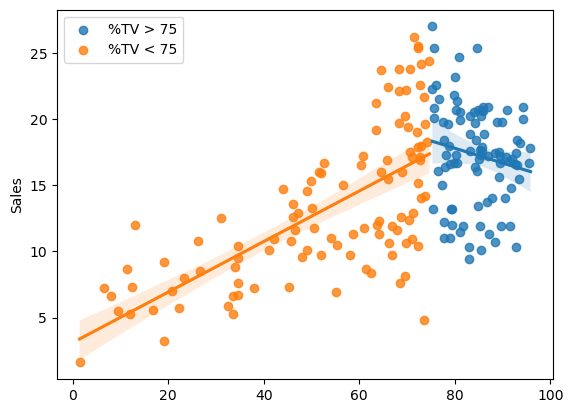

In [28]:
plt_data = df[(df.TV/(df.TV +df.Radio +df.Newspaper))*100 > 75]
sns.regplot(y=plt_data.Sales,x=(plt_data.TV/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt_data = df[(df.TV/(df.TV +df.Radio +df.Newspaper))*100 < 75]
sns.regplot(y=plt_data.Sales,x=(plt_data.TV/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt.legend(labels=['%TV > 75','_','_','%TV < 75'])


/tmp/ipykernel_153164/2292669343.py:5: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7cc2945bdb80> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%Radio > 15','_','_','%Radio < 15'])
/tmp/ipykernel_153164/2292669343.py:5: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7cc294c774d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%Radio > 15','_','_','%Radio < 15'])


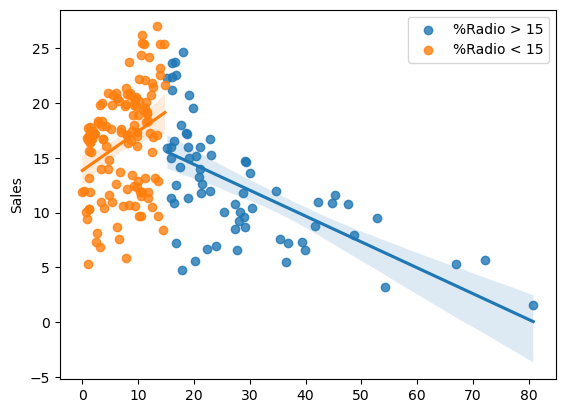

In [67]:
plt_data = df[(df.Radio/(df.TV +df.Radio +df.Newspaper))*100 > 15]
sns.regplot(y=plt_data.Sales,x=(plt_data.Radio/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt_data = df[(df.Radio/(df.TV +df.Radio +df.Newspaper))*100 < 15]
sns.regplot(y=plt_data.Sales,x=(plt_data.Radio/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt.legend(labels=['%Radio > 15','_','_','%Radio < 15'])


/tmp/ipykernel_153164/2372547137.py:5: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7cc28fc18bf0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%Newspaper > 15','_','_','%Newspaper < 15'])
/tmp/ipykernel_153164/2372547137.py:5: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7cc28fda98b0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['%Newspaper > 15','_','_','%Newspaper < 15'])


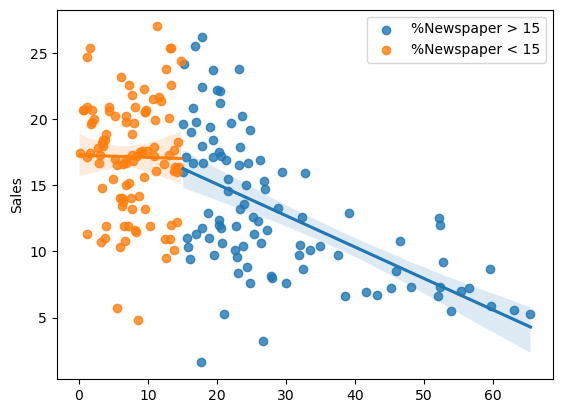

In [73]:
plt_data = df[(df.Newspaper/(df.TV +df.Radio +df.Newspaper))*100 > 15]
sns.regplot(y=plt_data.Sales,x=(plt_data.Newspaper/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt_data = df[(df.Newspaper/(df.TV +df.Radio +df.Newspaper))*100 < 15]
sns.regplot(y=plt_data.Sales,x=(plt_data.Newspaper/(plt_data.TV +plt_data.Radio +plt_data.Newspaper))*100)
plt.legend(labels=['%Newspaper > 15','_','_','%Newspaper < 15'])

/tmp/ipykernel_153164/1830830804.py:5: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7cc29c25eba0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])
/tmp/ipykernel_153164/1830830804.py:5: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7cc29613f470> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])
/tmp/ipykernel_153164/1830830804.py:5: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7cc29c446270> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])
/tmp/ipykernel_153164/1830830804.py:5: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7cc29c25ed80> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])


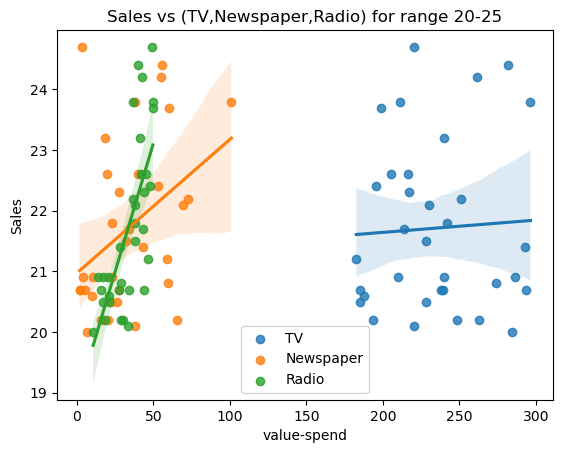

In [53]:
ran = '20-25'
sns.regplot(x='TV',y='Sales',data = df[df.bin == ran])
sns.regplot(x='Newspaper',y='Sales',data = df[df.bin == ran])
sns.regplot(x='Radio',y='Sales',data = df[df.bin == ran])
plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])
plt.xlabel('value-spend')
plt.title(f'Sales vs (TV,Newspaper,Radio) for range {ran}')
plt.show()

/tmp/ipykernel_153164/744432444.py:6: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7cc29c42d010> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])
/tmp/ipykernel_153164/744432444.py:6: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7cc296101310> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])
/tmp/ipykernel_153164/744432444.py:6: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x7cc294c21c40> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])
/tmp/ipykernel_153164/744432444.py:6: UserWarning: The label '_' of <matplotlib.collections.PolyCollection object at 0x7cc294c219d0> starts with '_'. It is thus excluded from the legend.
  plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])


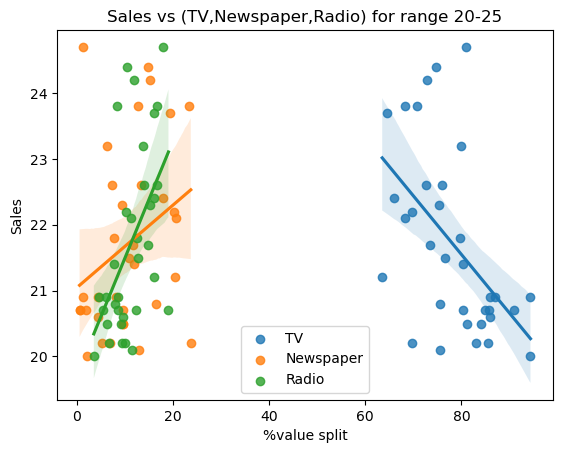

In [58]:
ran = '20-25'
p_data = df[df.bin == ran]
sns.regplot(x=(p_data.TV/(p_data.TV+p_data.Newspaper+p_data.Radio))*100,y=p_data.Sales)
sns.regplot(x=(p_data.Newspaper/(p_data.TV+p_data.Newspaper+p_data.Radio))*100,y=p_data.Sales)
sns.regplot(x=(p_data.Radio/(p_data.TV+p_data.Newspaper+p_data.Radio))*100,y=p_data.Sales)
plt.legend(labels=['TV','_','_','Newspaper','_','_','Radio'])
plt.xlabel('%value split')
plt.title(f'Sales vs (TV,Newspaper,Radio) for range {ran}')
plt.show()

In [64]:
stats = df.groupby('bin').aggregate({
    'TV':['mean','median','sum'],
    'Newspaper':['mean','median','sum'],
    'Radio':['mean','median','sum']
})
stats.reindex(index=bin_order)

TV                   Newspaper                     Radio  \
             mean  median      sum       mean median     sum       mean   
bin                                                                       
0-5      4.466667    4.10     13.4   5.133333   5.70    15.4  17.766667   
5-10    28.793548   23.80    892.6  32.019355  25.60   992.6  19.819355   
10-15   91.512281   89.70   5216.2  26.243860  23.20  1495.9  19.694643   
15-20  198.269565  199.80  13680.6  31.697101  28.90  2187.1  21.033824   
20-25  234.052941  229.20   7957.8  33.514706  27.25  1139.5  33.402941   
25+    274.650000  280.25   1647.9  46.716667  47.75   280.3  44.833333   

                      
      median     sum  
bin                   
0-5     11.6    53.3  
5-10    16.0   614.4  
10-15   16.5  1102.9  
15-20   21.8  1430.3  
20-25   36.4  1135.7  
25+     43.4   269.0